In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#tidal data on canvas
data = np.genfromtxt('groupdata.txt', dtype=[('day', 'i8'), ('time', 'U6'), ('height', 'f8')])


In [18]:
# Extract columns
days = np.array([entry[0] for entry in data])
times = np.array([entry[1] for entry in data])
heights = np.array([entry[2] for entry in data])

In [ ]:
# Convert hours to day, count them by days
def Time_to_FractionalDays(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours / 24 + minutes / (24 * 60)

In [20]:
time_in_days = np.array([Time_to_FractionalDays(t) for t in times])
xdata = days + time_in_days

In [ ]:
# Define the oscillatory function, A * sin(Ωt + φ)
def tide_model(x, A1, w1, phi1, A2, w2, phi2, C):
    return (
        A1 * np.sin(w1 * x + phi1) +
        A2 * np.sin(w2 * x + phi2) +
        C
    )

In [22]:
#Initial guess for parameters
initial_guess = [3, 2 * np.pi / 12.42, 0, 2, 2 * np.pi / 365.25, 0, 2]
#Fit the model to the data
params, covariance = curve_fit(tide_model, xdata, heights, p0=initial_guess, maxfev=10000)
#Find modeled data
model_heights = tide_model(xdata, *params)
#Find residuals, 
Residuals = heights - model_heights
#Find Standard deviation residuals
std_residuals = np.std(Residuals)
#Assuming experimental error is 0.25ft
exp_error = 0.25

In [23]:
#Intrinsic scatter = sqrt of stdres**2 - experr**2
intrinsic_scatter = np.sqrt(std_residuals**2 - exp_error**2)

In [ ]:
print(f"The standard deviation of residuals is {std_residuals:.3f} ft")
print(f"The intrinsic scatter in the data is {intrinsic_scatter:.3f} ft")
print(f"Is the scatter in the data larger than the assumed experimental error? {'Yes' if std_residuals > exp_error else 'No'}")

Standard deviation of residuals are 2.267 ft
Intrinsic scatter in the data are 2.253 ft
Is the scatter in the data larger than the assumed experimental error? Yes


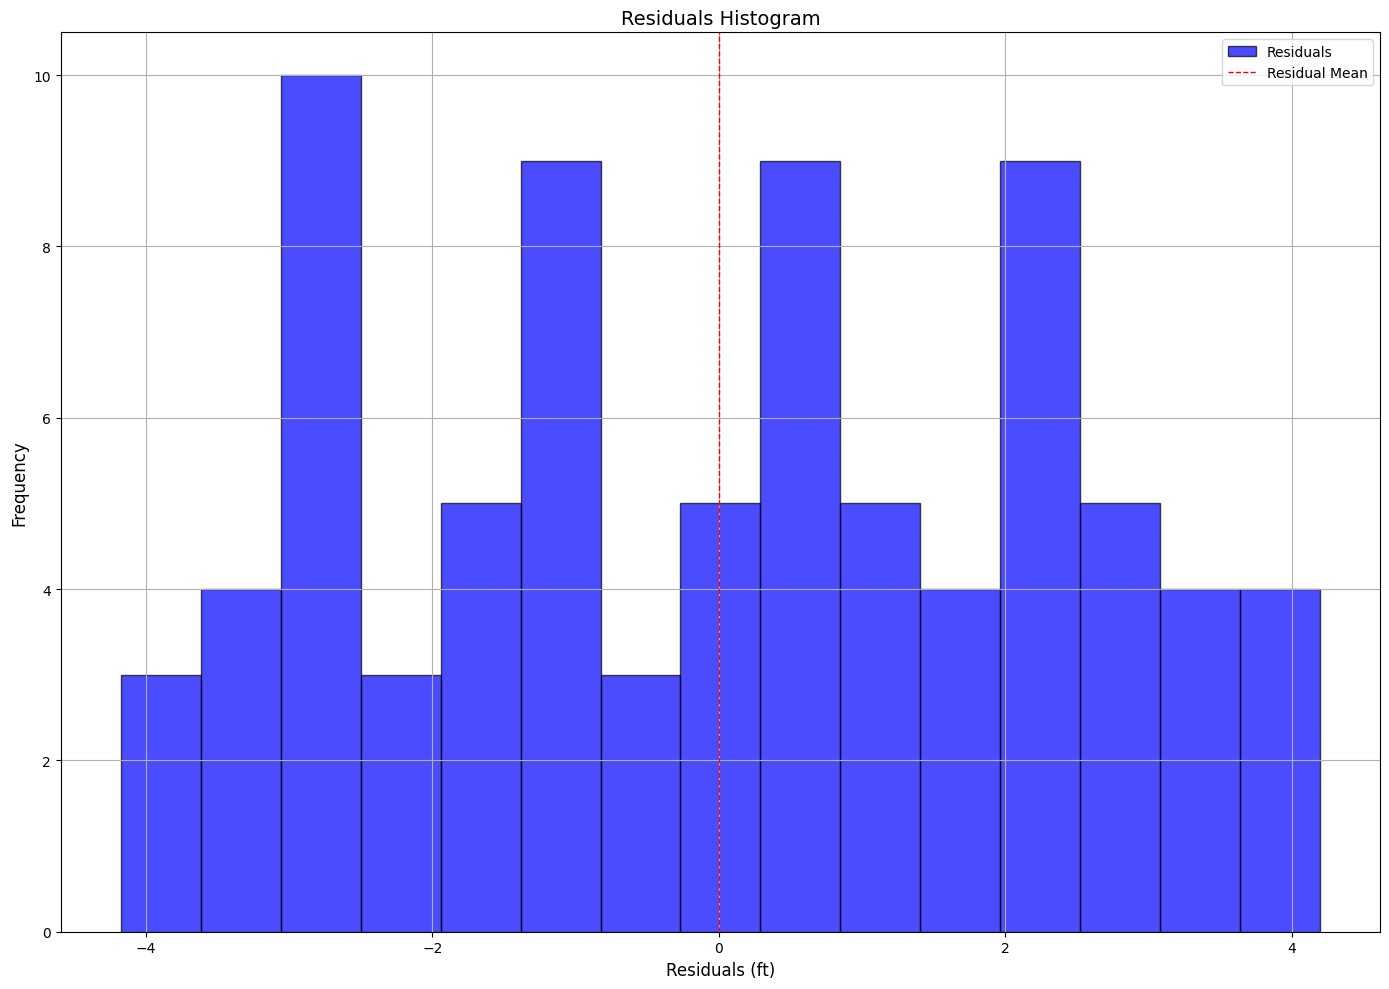

In [25]:
plt.figure(figsize=(14, 10))
plt.hist(Residuals, bins=15, color='blue', alpha=0.7, edgecolor='black', label='Residuals')
plt.axvline(0, color='red', linestyle='--', linewidth=1, label='Residual Mean')
plt.xlabel('Residuals (ft)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residuals Histogram', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

In [ ]:
#Part 4, Tsunami event
#Identify the tsunami on January 14, ~7:22 AM, that had the tide height of 5.33
tsunami_time = 14 + Time_to_FractionalDays("7:22")
tsunami_index = np.argmin(np.abs(xdata - tsunami_time))

In [ ]:
#Add a 2ft of outlier for tsunami
heights_with_tsunami = heights.copy()
heights_with_tsunami[tsunami_index] += 2

In [ ]:
#Solveresiduals with tsunami
Tsunami_Residuals = heights_with_tsunami - tide_model(xdata, *params)

In [ ]:
#Calculate tsunami deviation in terms of standard deviations
tsunami_deviation = 2 / std_residuals
print(f"Tsunami deviation: {tsunami_deviation:.2f} standard deviations")

Tsunami deviation: 0.88 standard deviations


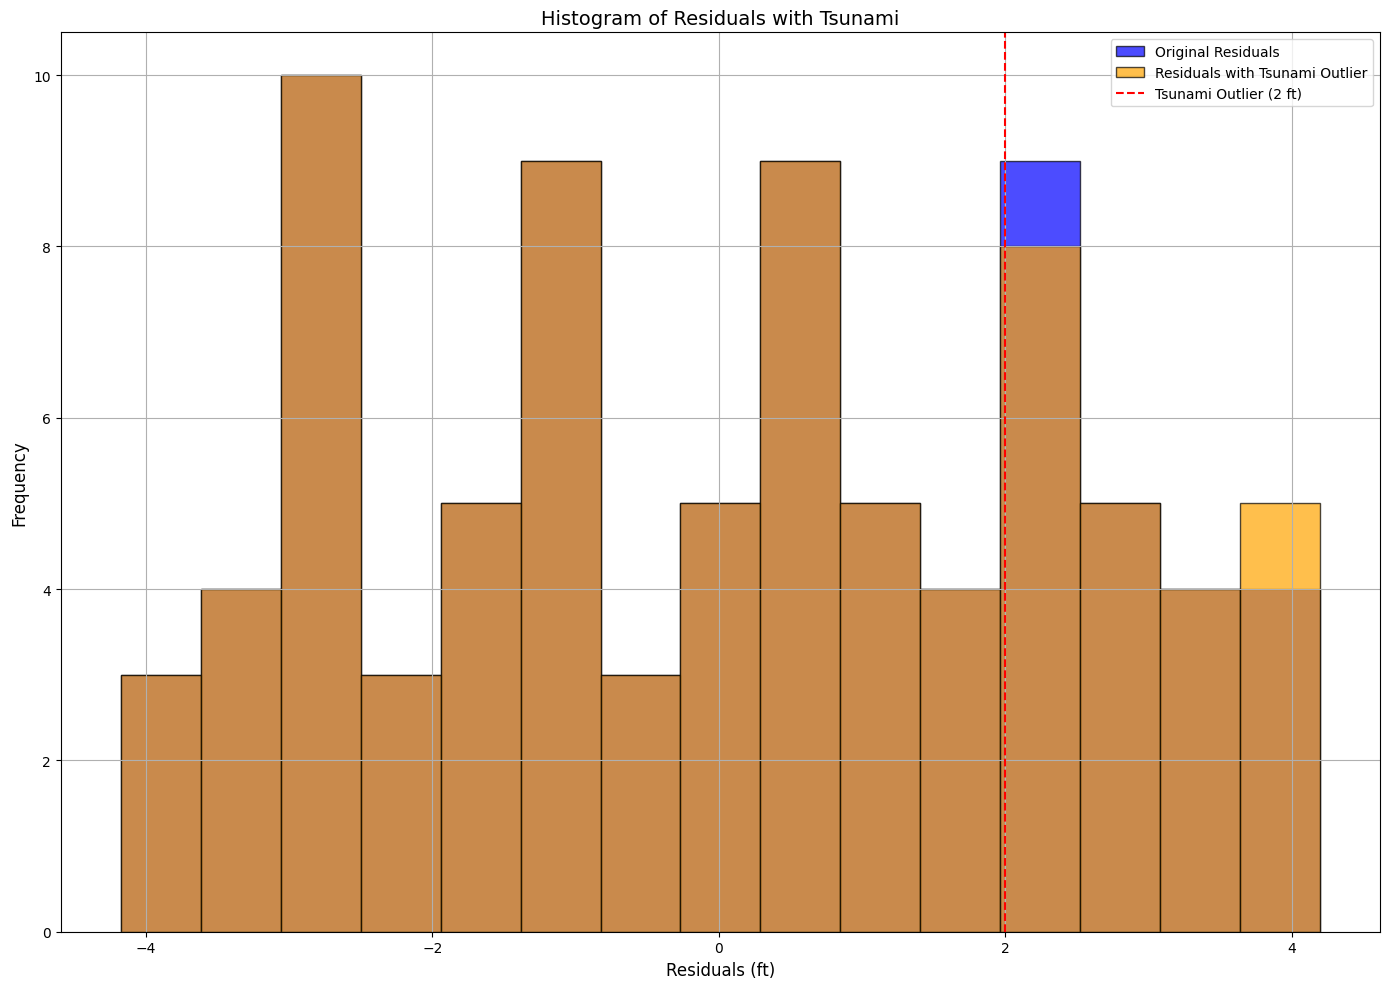

In [ ]:
#Plot histogram of residuals before and after adding tsunami outlier
plt.figure(figsize=(14, 10))
plt.hist(Residuals, bins=15, alpha=0.7, label='Original Residuals', edgecolor='black', color='blue')
plt.hist(Tsunami_Residuals, bins=15, alpha=0.7, label='Residuals with Tsunami Outlier', edgecolor='black', color='orange')
plt.axvline(2, color='red', linestyle='--', label="Tsunami Outlier (2 ft)")
plt.xlabel('Residuals (ft)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Residuals with Tsunami', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

In [31]:
#Save them as PDF 
plt.savefig('residuals_with_tsunami_histogram.pdf')
plt.savefig('Residuals Histogram.pdf')
plt.show()

<Figure size 640x480 with 0 Axes>